# Info 2950 Final Project - Melanie Chen (mc2234)

## Analyzing Apple App Store and Google Play Store Data

## Phase V

### Introduction

#### Research Project Context

   - The context of this research project is to identify what app attributes and characteristics distinguish successful apps with higher user ratings from those with low ratings. In particular, we are interested in discovering whether there are significant differences in quality between Apple App Store apps versus Google Play Store apps. Moreover, we seek to investigate whether special apps that provide **dual support** for both platforms have any sort of advantage in terms of quality / signal a better quality app to users. The importance of this research is related to to the significance of applications on personal devices which millions of Americans rely on in their daily lives. If one were able to pin point key characteristics that app creators should focus on for success, this would provide a great service to Americans in need of better applications and also help users avoid over-paying for apps that are of low-quality.


#### Research Questions 

1. Do certain app attributes lead to higher user ratings / better reviews?

2. Do certain app attributes lead to better app success (measured in number of installs / downloads)?

3. How can we use specific app attributes to predict potential user ratings?

4. Is it possible for "fake" apps to simulate high ratings behavior and become successful?

5. Can quality be observed from user ratings? If so, how do Apple Only, Google Only, and Dual Support Apps compare in terms of potential quality (user rating) differences?


#### Main Findings

 - Overall, we were able to make interesting discoveries in response to the research questions stated above using our linear regression model analyses and K-Means clustering analyses. Below, we highlight key findings and the implications of these results for real-world applications:
 
 1. Key app characteristics, such as: `editors_choice_g`, `primary_genre_a`, `price_a`, `free_a`, and `dual_support` have significant weight in predicting potential user ratings. 
 2. Specifically, app characteristics like `editors_choice_g` and certain app genres lead to higher user ratings but the former is realistically more difficult for "fake" apps to simulate.
 3. `dual_support` leads to higher ratings for Google apps than Apple apps which reveals differences in app user preferences across platforms. 
 4. Relative app quality differences can be observed through user ratings but not necessarily absolute quality differences.

### Data Description Section
 - **What are the observations (rows) and the attributes (columns)?**
     - The rows of the dataset represent each app and the columns represent different app attributes, such as Primary Genre, Average User Rating, Free, Dual Support Status, App Type, etc...
 - **Why was this dataset created?**
     - The `all_apps_clean.csv` analysis-ready dataset created below was created to analyze the relationship between Apple App Store Data and Google Play Store App Data. Specifically, we are interested in examining what app characteristics lead to higher user ratings. In particular, we generate a `dual_support` status variable to explore how an app having both stores support impacts their user ratings.
 - **Who funded the creation of the dataset?**
     - The dataset was created using publicly available web-scraped data collected from Kaggle. Thus, it was free and no funding was required for the creation of this particualr analysis dataset.
 - **What processes might have influenced what data was observed and recorded and what was not?**
     - The initial web-scraping process of the raw input data by Kaggle creator Gautham Prakash definitely influenced what was recorded into the two original raw datasets that we merge to form our analysis-ready dataset. The raw data creator scraped data by applying a word dictionary of 300,000+ words in a variety of languages in the app search bar to search for the top apps in each category as well all apps by each app creator found. Thus, apps that were not related to popular key words or creators most likely didn't end up being recorded in the final raw datasets.
 - **What preprocessing was done, and how did the data come to be in the form that you are using?**
     - To clean our raw data inputs, we made a variety of assumptions in defining what determines a "fake app" that should be dropped from our dataset. Specifically, we removed any apps that had update dates into the future (after present date) since this did not logically make sense. In addition, we decided to use minimum number of reviews of 100 and a minimum rating score of 0.0 as metrics for a real app. Thus, we dropped any apps that had less than 100 reviews and / or had a rating less than 0.0.
     - The raw data inputs also included many duplicate versions of the same app (older versions of the exact same app). Thus, by sorting by last date update we removed any older versions by only keeping the latest version of the app.
 - **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
     - People (app users in this case) were most likely unaware of the data collection even though they probably expected their reviews to be available for public view. Users most likely expected their reviews data to be used in aiding other users from downloading bad (low-rated) apps and recommending good (high-rated) apps.
     - On the other hand, App Creators are likely aware that their app data is available for collection. App Creators are also likely to download their data in order to better analyze their app performance and success.
 - **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** 
     - The raw source data can be found directly on kaggle.com.
         - Apple App Store Data: https://www.kaggle.com/gauthamp10/apple-appstore-apps
         - Google Play Store Data: https://www.kaggle.com/gauthamp10/google-playstore-apps
     - All Raw Data and Cleaned Data can be found directly below at this Cornell Box Link:
         - Cornell Box Share Link: https://cornell.box.com/s/x7mr9w87upvghd3bwovgew1vmj8k5c7b

### Pre-Registration of Analyses

In order to analyze the relationship between our key 7 independent variables of interest listed below and the user rating of an app, we pre-registered the following two analyses for our final report:

1. Multivariable Linear Regression Model

2. K-Means Cluster Analysis

In the following sections, we shall discuss the reasoning behind implementing these two types of analyses in terms of real world applications and the value of any discoveries and findings that our final results will have on the discussion of key app attributes and characteristics for future app creators and App Store ranking algorithms.

### Data Analysis

In [1]:
#Loading Libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from Packages.kmeans_interp.kmeans_feature_imp import KMeansInterp

In [2]:
### Reading in Cleaned Analysis File

all_apps = pd.read_csv("Data/Clean_Data/all_apps_clean.csv", low_memory = False)

#### Descriptive Summary Statistics for Cleaned Analysis Data

In [3]:
## Generate Apple Only, Google Only, and Dual Support Only Sub-Datasets

apple_only = all_apps[(all_apps['app_id_a'].notna()) & (all_apps['dual_support']== False)]

google_only = all_apps[(all_apps['app_id_g'].notna()) & (all_apps['dual_support']== False)]

dual_only = all_apps[all_apps['dual_support'] == True]

We calculate descriptive statistics for key variables of interest that may impact user ratings which is crucial to the future model we hope to build. Here, they are sorted by app type and only show relevant variables to each app type.

In [4]:
#### Descriptive Statistics for Key Variables of Interest by App Type

print("Apple Only: \n")
display(round(apple_only[['average_user_rating_a', 'primary_genre_a', 'reviews_a','dual_support','free_a', 'price_a']].describe(include = ['object','float','bool']),2))
print("\nGoogle Only: \n")
display(round(google_only[['installs_g', 'dual_support', 'editors_choice_g', 'ad_supported_g']].describe(include = ['object','float','bool']),2))
print("\nDual Support Only: \n")
display(round(dual_only[['average_user_rating_a', 'primary_genre_a', 'reviews_a', 'installs_g', 'dual_support', 'editors_choice_g', 'ad_supported_g', 'free_a', 'price_a']].describe(include = ['object','float','bool']),2))

Apple Only: 



,average_user_rating_a,primary_genre_a,reviews_a,dual_support,free_a,price_a
count,49906.00,49906,49906.00,49906,49906,49788.00
unique,NaN,26,NaN,1,2,NaN
top,NaN,Games,NaN,False,True,NaN
freq,NaN,16515,NaN,49906,45927,NaN
mean,4.41,NaN,10655.78,NaN,NaN,0.42
std,0.54,NaN,172550.08,NaN,NaN,3.15
min,1.07,NaN,100.00,NaN,NaN,0.00
25%,4.29,NaN,184.00,NaN,NaN,0.00
50%,4.57,NaN,421.00,NaN,NaN,0.00
75%,4.73,NaN,1642.00,NaN,NaN,0.00



Google Only: 



,installs_g,dual_support,editors_choice_g,ad_supported_g
count,3.569050e+05,356905,356905,356905
unique,NaN,1,2,2
top,NaN,False,False,True
freq,NaN,356905,356343,235148
mean,8.168385e+05,NaN,NaN,NaN
std,3.134850e+07,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN
25%,1.000000e+04,NaN,NaN,NaN
50%,5.000000e+04,NaN,NaN,NaN
75%,1.000000e+05,NaN,NaN,NaN



Dual Support Only: 



,average_user_rating_a,primary_genre_a,reviews_a,installs_g,dual_support,editors_choice_g,ad_supported_g,free_a,price_a
count,17392.00,17392,17392.00,1.739200e+04,17392,17392,17392,17392,17392.00
unique,NaN,26,NaN,NaN,1,2,2,2,NaN
top,NaN,Games,NaN,NaN,True,False,False,True,NaN
freq,NaN,6456,NaN,NaN,17392,17109,9743,16317,NaN
mean,4.33,NaN,27381.04,5.739118e+06,NaN,NaN,NaN,NaN,0.28
std,0.70,NaN,302300.22,9.871278e+07,NaN,NaN,NaN,NaN,1.82
min,1.05,NaN,100.00,1.000000e+02,NaN,NaN,NaN,NaN,0.00
25%,4.26,NaN,249.00,1.000000e+04,NaN,NaN,NaN,NaN,0.00
50%,4.59,NaN,797.00,1.000000e+05,NaN,NaN,NaN,NaN,0.00
75%,4.74,NaN,4141.25,1.000000e+06,NaN,NaN,NaN,NaN,0.00


#### Data Exploration / Visualization of Cleaned Data

Below, we provide graph visualizations of our cleaned dataset created for data exploration to identify what key variables of interest we would want to later implement into our linear regression models and cluster analysis. In addition, we add commentary on their importance for our model analyses. For a detailed compiliation of raw to cleaned data transformation, please see our **Data Cleaning Appendix**  which includes step-by-step code on how to convert our raw data into our cleaned analysis data file.

#### Functions Created for Graph Analysis / Exploration

In [5]:
## Creating Box Plot Generating Function for Data Analysis and Exploration

sns.set_theme(style = "ticks", palette = "colorblind")

def gen_boxplt(x_var, y_var, width, length, df):
    plt.rcParams["figure.figsize"] = (width, length)
    sns.boxplot(x = x_var, y = y_var, data = df)
    
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    
    y_label = y_var.replace('_', ' ')
    y_label = y_var.upper()
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(y_label + " by " + x_label)
    plt.show()

In [6]:
## Creating Multiple Box Plot Generating Function for Data Analysis and Exploration

sns.set_theme(style = "ticks", palette = "colorblind")

def group_boxplt(x_var, y_var, width, length, sort, df):
    plt.rcParams["figure.figsize"] = (width, length)
    sns.boxplot(x = x_var, y = y_var, hue = sort, data = df)
    
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    
    y_label = y_var.replace('_', ' ')
    y_label = y_var.upper()
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(y_label + " by " + x_label)
    plt.show()

In [7]:
## Function to Generate Median List for Detailed Analysis at Numbers / Boxplots

def gen_median_list(x_var, y_var, df):
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    y_label = y_var.replace('_', ' ')
    y_label = y_var.upper()
    
    print(y_label + " by " + x_label +": \n")
    print(round(df.groupby([x_var])[y_var].median(),2).sort_values(ascending = False))

In [8]:
def gen_scatterplt(x_var, y_var, width, length, df):
    plt.rcParams["figure.figsize"] = (width, length)
    sns.relplot(x = x_var, y = y_var, data = df)
    
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    y_label = y_var.replace('_', ' ')
    y_label = y_var.upper()
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(y_label + " by " + x_label)
    plt.show()

In [9]:
## Creating Modified Multiple Box Plot Generating Function for Data Analysis and Exploration

def multi_scatterplt(x_var, y_var, width, length, df):
    plt.rcParams["figure.figsize"] = (width, length)
    sns.relplot(x = x_var, y = y_var, col = 'app_type', hue = 'app_type', data = df)
    
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    y_label = y_var.replace('_', ' ')
    y_label = y_var.upper()
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(y_label + " by " + x_label)
    plt.show()

In [10]:
## Creating Histogram Generating Function for Analysis

def gen_hist(x_var, width, length, df):
    plt.rcParams["figure.figsize"] = (width, length)
    sns.histplot(x = x_var, data = df)
    
    x_label = x_var.replace('_', ' ')
    x_label = x_label.upper()
    
    plt.xlabel(x_label)
    plt.show()

#### Graphs and Data Visualization

[NOTE:] Due to limitations in variables collected and our merged dataset, certain graphs below only contain 2 of 3 app types in order ensure valid comparisons.

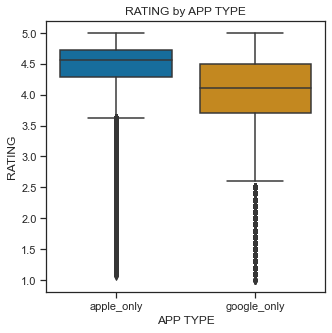

RATING by APP TYPE: 

app_type
apple_only     4.57
google_only    4.10
Name: rating, dtype: float64


In [11]:
## Analyzing Average User Rating by Type

no_dual = all_apps[all_apps['dual_support'] == False]

gen_boxplt('app_type', 'rating', 5, 5, no_dual)

gen_median_list('app_type', 'rating', no_dual)

From the box plot above, we notice when comparing Apple Only apps to Google Only apps that apple user ratings tend to be higher than google ratings. This leads to interesting questions for further exploration whether this is indicative of Apple apps being of superior quality or due to other factors yet to be considered.

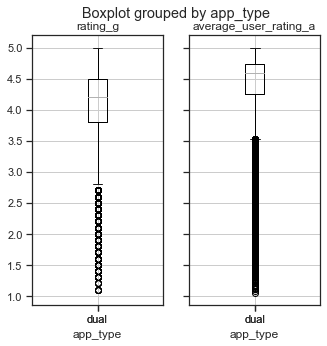

Google Ratings Median:

4.2

Apple Ratings Median:

4.59


In [12]:
## Analyzing Difference between Apple and Google Ratings for Apps with Dual Support

plt.rcParams["figure.figsize"] = (5, 5)
dual_only.boxplot(['rating_g', 'average_user_rating_a'], 'app_type')
plt.show()

print("Google Ratings Median:\n")
print(round(dual_only['rating_g'].median(),2))
print("\nApple Ratings Median:\n")
print(round(dual_only['average_user_rating_a'].median(),2))

From the grouped boxplot above, we notice that within dual support apps it seems that the Apple version ratings tend to be higher than the Google version ratings.

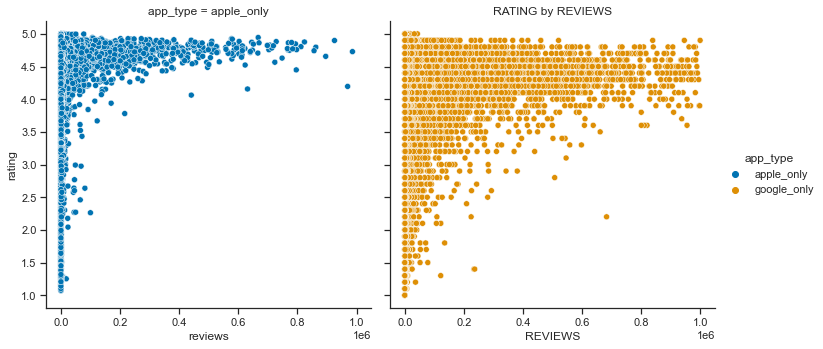

In [13]:
## Plotting Number of Reviews vs Ratings (excluding any Outliers)

no_dual_outliers = no_dual[no_dual['reviews'] <= 1e6]

multi_scatterplt('reviews', 'rating', 20, 50, no_dual_outliers)

From the scatterplots above, we notice that as the number of reviews increase there becomes less variation in the range of user ratings. We can observe this from the trend of vertical width of the points narrowing as the number of reviews increases. In addition, it seems that the more reviews an app has the higher its rating tends to be generally.

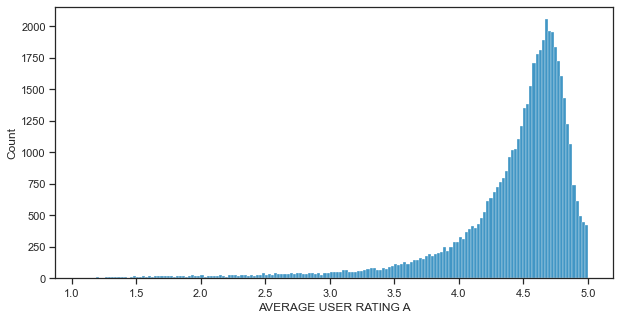

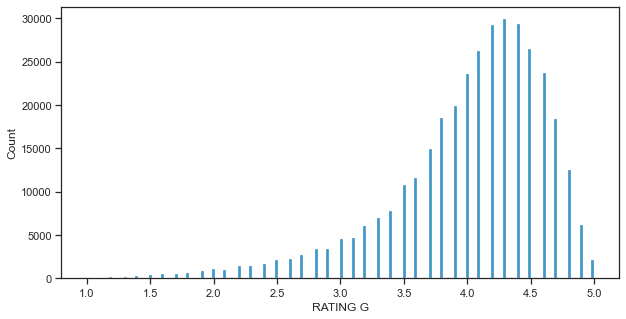

In [14]:
### Histogram Comparing Apple Only and Google Only Ratings

gen_hist('average_user_rating_a', 10, 5, apple_only)
gen_hist('rating_g', 10, 5, google_only)

From the two histograms above, we can observe the distribution shape of ratings for Apple only apps and Google only apps seems to pretty similar (left-skewed). The left-skewness of both graphs is interesting as it reveals most apps present in both app stores have high ratings (more successful). This could also reveal human preferences to be more generous and give more good ratings than bad ones on average. However, most Apple ratings seem to be after 4.5 which is a little higher than 4.0-4.5 where most of the Google ratings are.

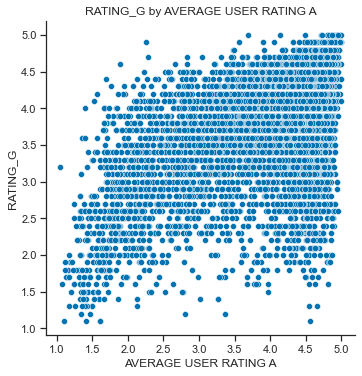

In [15]:
## Analyzing Apple Ratings vs Google Ratings for Dual Supported Apps

gen_scatterplt('average_user_rating_a', 'rating_g', 10, 5, dual_only)

From graph above, it seems like Apple ratings and Google ratings tend to be in agreement for dual supported apps. We can observe this since there seem to be very few points in the top left and bottom right corners which would be when the 2 ratings would be polar opposites of each other.

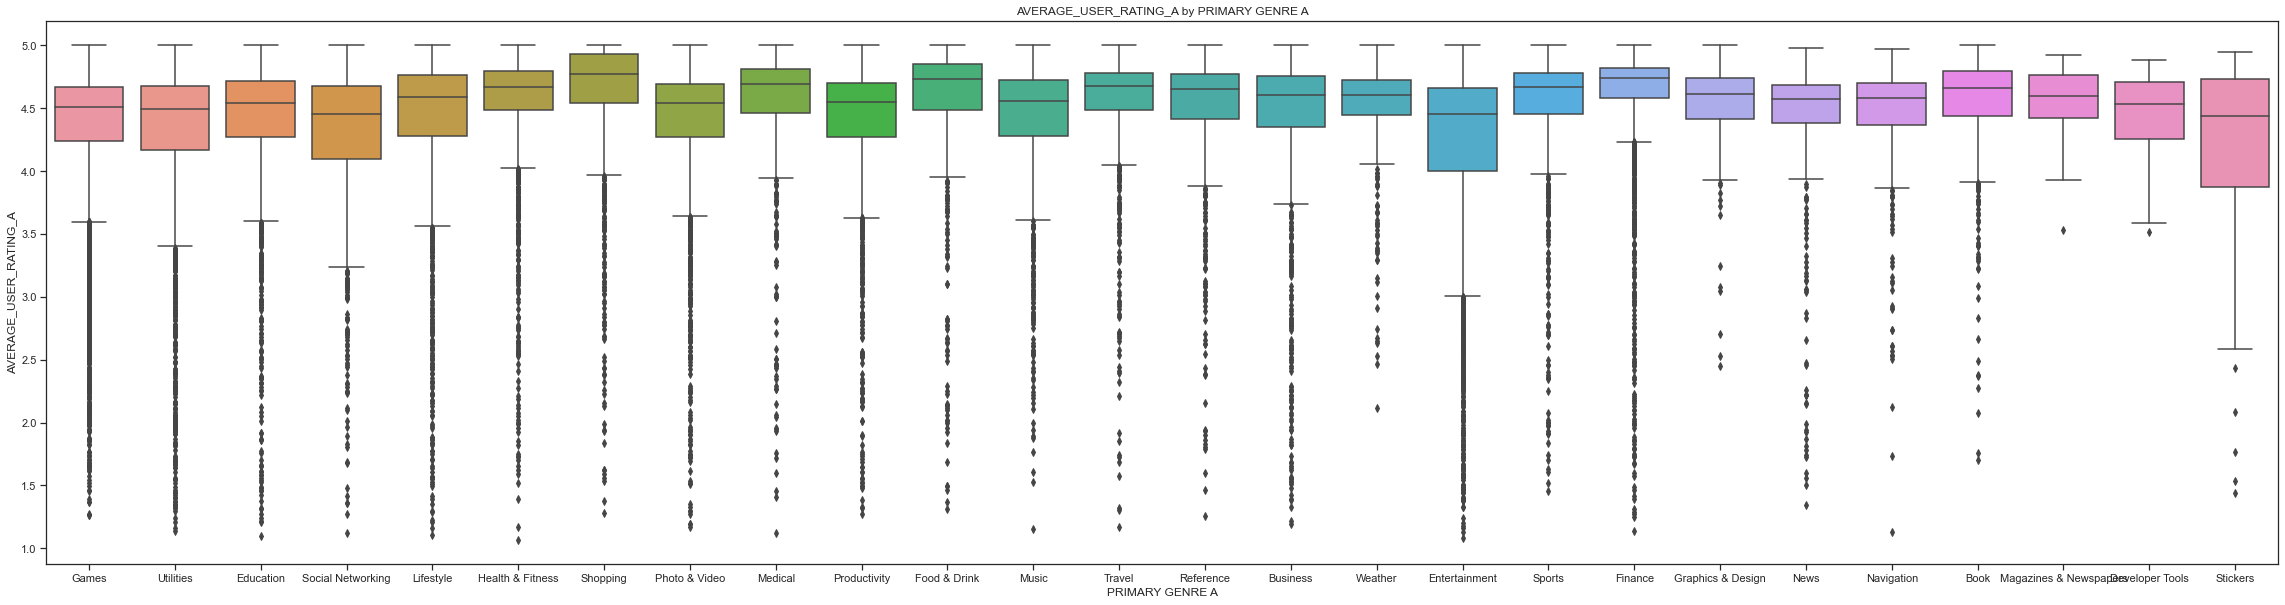

Apple Only Genre Medians:

AVERAGE_USER_RATING_A by PRIMARY GENRE A: 

primary_genre_a
Shopping                  4.77
Finance                   4.74
Food & Drink              4.73
Medical                   4.69
Travel                    4.67
Health & Fitness          4.67
Book                      4.66
Sports                    4.66
Reference                 4.65
Business                  4.61
Weather                   4.61
Graphics & Design         4.61
Magazines & Newspapers    4.60
Lifestyle                 4.59
Navigation                4.58
News                      4.57
Music                     4.56
Productivity              4.55
Photo & Video             4.54
Education                 4.54
Developer Tools           4.54
Games                     4.51
Utilities                 4.49
Entertainment             4.45
Social Networking         4.45
Stickers                  4.44
Name: average_user_rating_a, dtype: float64


In [16]:
## Analyzing Average User Rating by Primary Genre for Apple Only

gen_boxplt('primary_genre_a', 'average_user_rating_a', 40, 10, apple_only)

print("Apple Only Genre Medians:\n")

gen_median_list('primary_genre_a', 'average_user_rating_a', apple_only)

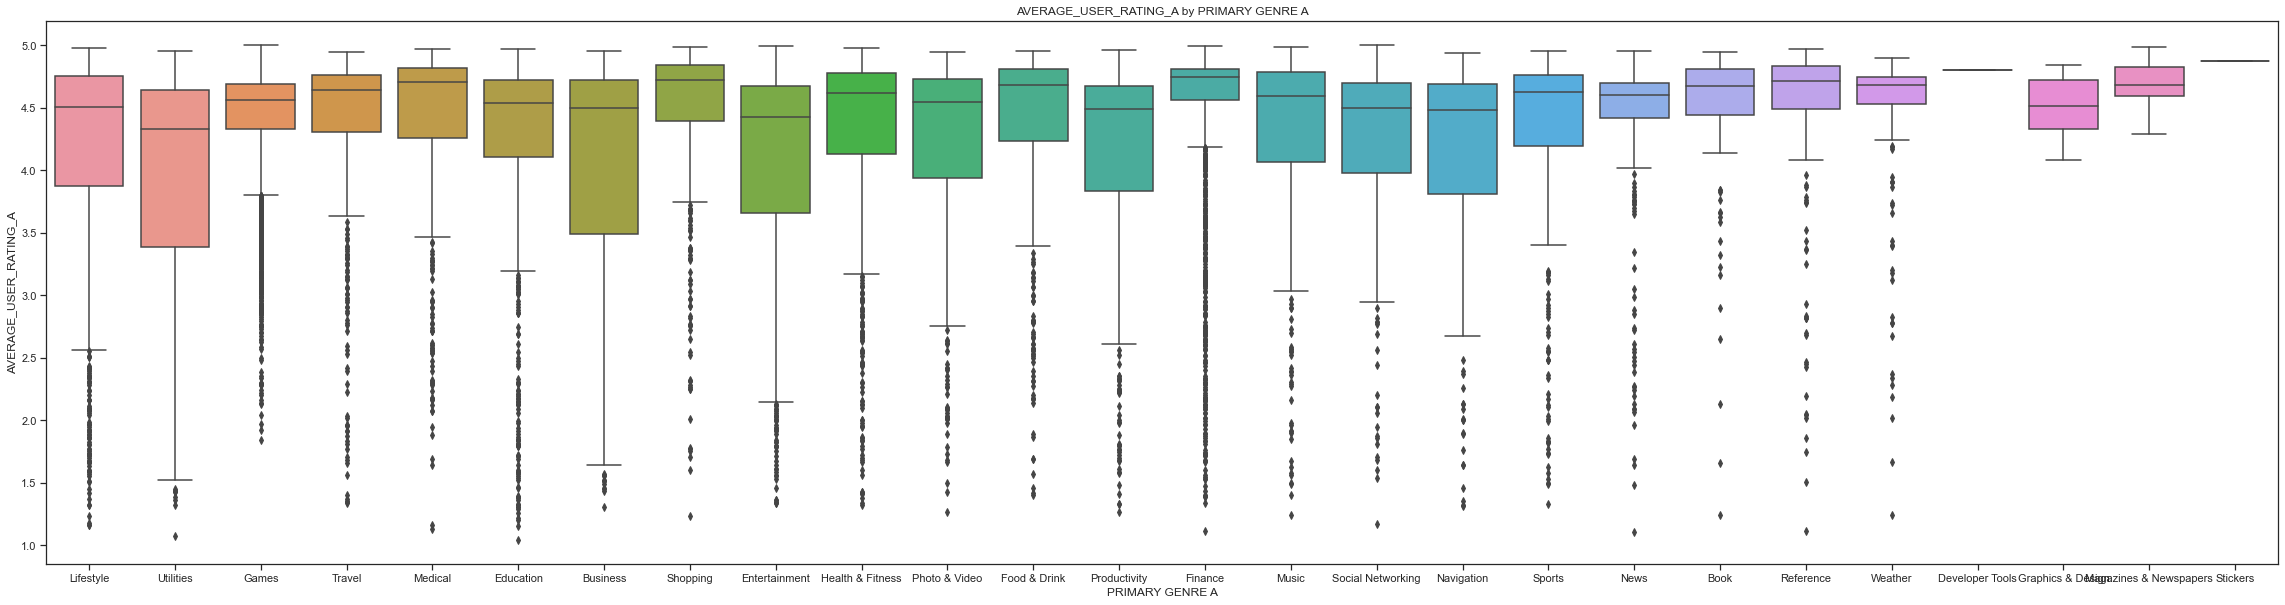

Dual Only Genre Medians:

AVERAGE_USER_RATING_A by PRIMARY GENRE A: 

primary_genre_a
Stickers                  4.87
Developer Tools           4.81
Finance                   4.75
Shopping                  4.72
Reference                 4.71
Medical                   4.71
Book                      4.68
Magazines & Newspapers    4.68
Weather                   4.68
Food & Drink              4.68
Travel                    4.64
Sports                    4.63
Health & Fitness          4.62
News                      4.60
Music                     4.59
Games                     4.56
Photo & Video             4.55
Education                 4.54
Graphics & Design         4.52
Lifestyle                 4.51
Business                  4.50
Social Networking         4.50
Productivity              4.49
Navigation                4.48
Entertainment             4.43
Utilities                 4.33
Name: average_user_rating_a, dtype: float64


In [17]:
## Analyzing Average User Rating by Primary Genre for Dual Only

gen_boxplt('primary_genre_a', 'average_user_rating_a', 40, 10, dual_only)

print("Dual Only Genre Medians:\n")
gen_median_list('primary_genre_a', 'average_user_rating_a', dual_only)

From the two Apple Only and Dual Only boxplots by genre above, we can easily see from the list of medians that the top 5 highest rating categories change slightly. Thus, showing promising evidence that app genre does influence user ratings which agrees with intuition.

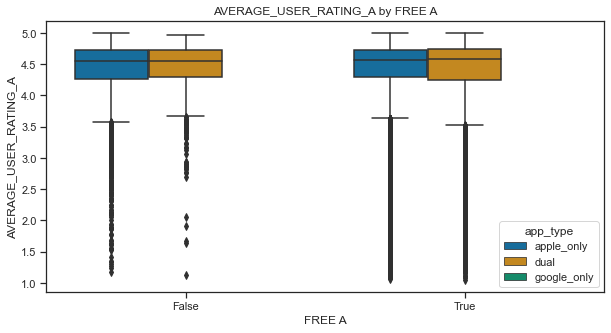

Apple Only: 

AVERAGE_USER_RATING_A by FREE A: 

free_a
True     4.57
False    4.55
Name: average_user_rating_a, dtype: float64

Dual Only: 

AVERAGE_USER_RATING_A by FREE A: 

free_a
True     4.59
False    4.55
Name: average_user_rating_a, dtype: float64


In [18]:
## Analyzing Average User Rating by Free / Paid Status for Apple Only and Dual Only

group_boxplt('free_a', 'average_user_rating_a', 10, 5, 'app_type', all_apps)

print("Apple Only: \n")
gen_median_list('free_a', 'average_user_rating_a', apple_only)
print("\nDual Only: \n")
gen_median_list('free_a', 'average_user_rating_a', dual_only)

From the box plot above, we find very slight differences in user ratings and the status of an app being free or paid. However, in both app types we notice that free apps tend to have slightly higher ratings which makes sense since users most likely enjoy apps for free as opposed to paying for them which might drive down their utility once they factor in costs.

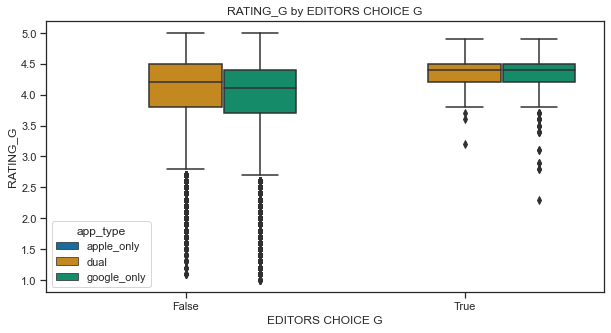

Google Only:

RATING_G by EDITORS CHOICE G: 

editors_choice_g
True     4.4
False    4.1
Name: rating_g, dtype: float64

Dual Only:
RATING_G by EDITORS CHOICE G: 

editors_choice_g
True     4.4
False    4.2
Name: rating_g, dtype: float64


In [19]:
## Analyzing Average User Rating by Editor's Choice Status

group_boxplt('editors_choice_g', 'rating_g', 10, 5, 'app_type', all_apps)

print("Google Only:\n")
gen_median_list('editors_choice_g', 'rating_g', google_only)
print("\nDual Only:")
gen_median_list('editors_choice_g', 'rating_g', dual_only)

From the box plots above, we notice that being and Editor's Choice app tends to lead to slightly higher user ratings for Google Only and Dual Only apps which makes sense intuitively.

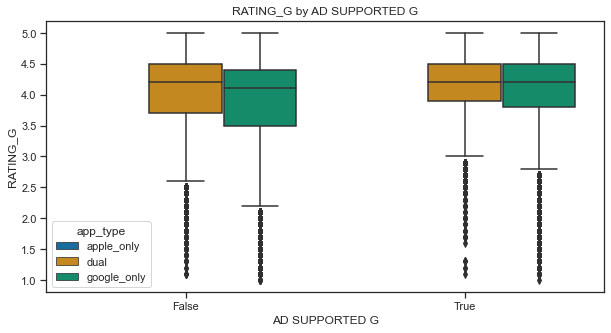

Google Only:

RATING_G by AD SUPPORTED G: 

ad_supported_g
True     4.2
False    4.1
Name: rating_g, dtype: float64

Dual Only:
RATING_G by AD SUPPORTED G: 

ad_supported_g
False    4.2
True     4.2
Name: rating_g, dtype: float64


In [20]:
## Analyzing Average User Rating by Ad Support Status for Google Only

group_boxplt('ad_supported_g', 'rating_g', 10, 5, 'app_type', all_apps)

print("Google Only:\n")
gen_median_list('ad_supported_g', 'rating_g', google_only)
print("\nDual Only:")
gen_median_list('ad_supported_g', 'rating_g', dual_only)

From the box plots above, we find that having Advertisement support doesn't seem to impact user ratings that much as one might expect with the general intuition that users might find advertisements to be inconvenient and a nuisance.

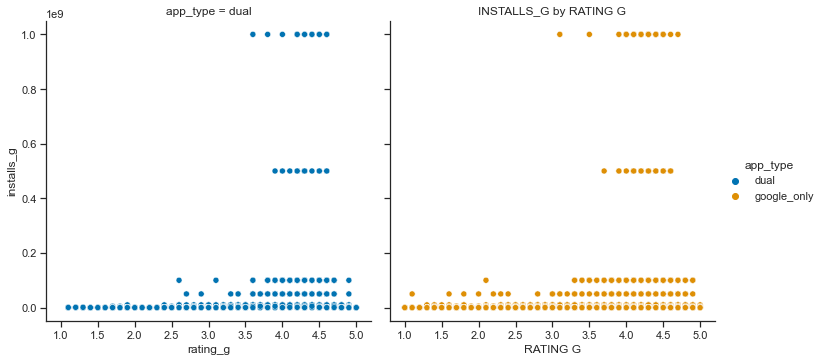

In [21]:
## Analyzing Number of Installs vs Ratings for Google Only and Dual Only

no_install_outliers = all_apps[all_apps['installs_g']<= 0.4 * 1e10]

multi_scatterplt('rating_g', 'installs_g', 50, 10, no_install_outliers[no_install_outliers['app_type']!= 'apple_only'])

From the two scatterplots above, we can interpret the relationship between Google Ratings and Number of Installs as the more number of installs the higher the rating typically. This makes sense as there is probably more variation in user ratings for apps with less downloads as opposed to more popular or successful apps with a large number of downloads.

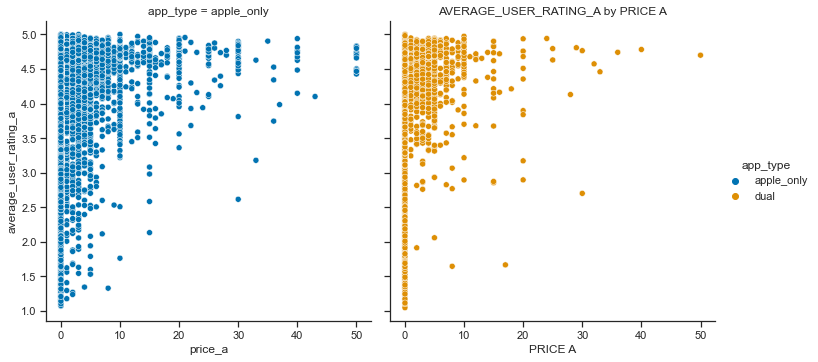

In [22]:
## Analyzing Average User Rating by Price for Apple Only and Dual Only

no_price_outliers = all_apps[all_apps['price_a']<=50]

multi_scatterplt('price_a', 'average_user_rating_a', 50, 10, no_price_outliers)

From the two scatterplots above, we can observe the general relationship between price and Apple ratings as a positive one. Typically, as the price increases we find the user rating also increases which we find with the narrowing of points from left to right on both plots. We can interpret this as free apps have a large variation in possible user ratings whereas paid apps typically having high ratings. This could be due to user incentives to only purchase apps they deem are good quality and worth it or unpopular paid apps being unable to sustain a profit making it harder for them to persist as opposed to free apps with low ratings.

As you can see, from our data exploration we were able to pinpoint 7 key independent variables of interest that we believe will have an impact on an app's (Apple / Google / Both) user rating:

#### Selected Variables of Interest for Model from Data Exploration

    - primary_genre_a
    - reviews_a
    - installs_g
    - dual_support
    - editors_choice_g
    - free_a
    - price_a

We shall attempt incorporating and applying these variables into our multivariable linear regression models below. The ultimate goal being to predict user ratings for apps based on a set of these 7 app characteristics which we analyzed above to have some level of influence on user ratings.

### Multivariable Linear Regression Model Analyses

In [23]:
### Creating separate dataframes for each Multivariable Linear Regression Model Set-Up / Future Analysis

all_apple = all_apps[(all_apps['app_id_a'].notna())]

all_google = all_apps[(all_apps['app_id_g'].notna())]

In [24]:
### Removing Unnecessary App Attribute Columns from new Dataframe Subsets

apple_features = ['app_id_a', 'app_name', 'appstore_url_a', 'primary_genre_a',
       'content_rating_a', 'size_bytes_a', 'required_ios_version_a',
       'released_a', 'updated_a', 'version_a', 'price_a', 'currency_a',
       'free_a', 'developerid_a', 'developer_a', 'developer_url_a',
       'developer_website_a', 'average_user_rating_a', 'reviews_a',
       'current_version_score_a', 'current_version_reviews_a', 'dual_support', 'app_type', 'rating', 'reviews']
google_features = ['app_name', 'app_id_g', 'category_g', 'rating_g', 'rating_count_g',
       'installs_g', 'minimum_installs_g', 'maximum_installs_g', 'free_g',
       'price_g', 'currency_g', 'size_g', 'minimum_android_g',
       'developer_id_g', 'developer_website_g', 'developer_email_g',
       'released_g', 'last_updated_g', 'content_rating_g', 'privacy_policy_g',
       'ad_supported_g', 'in_app_purchases_g', 'editors_choice_g',
       'scraped_time_g','dual_support', 'app_type', 'rating', 'reviews']

all_apple = all_apple[apple_features]

all_google = all_google[google_features]

In [25]:
### Creating Function for each Regression Model Set-Up / Collinearity Check

def reg_model_setup (ind_vars, cat_vars, heat_vars, df):
    
    ### Keeping Only Columns Necessary for Regression
    df = df[ind_vars] 
    
    ### Generate Dummy Indicator Variables for Categorical Variables
    df = pd.get_dummies(data = df, columns = cat_vars, drop_first = True) 
    
    ### Checking for Collinearity in Model
    print("Correlation Matrix: \n")
    display(df[df.columns].corr())
    
    ## Visualize Correlation
    print("Heat Map Visualization: \n")
    plt.rcParams["figure.figsize"] = (10, 5)
    sns.heatmap(df[heat_vars].corr(), center=0, cmap='coolwarm')
    plt.tight_layout()
    plt.show()
    
    return (df)

#### **Regression 1** - Dual Support Only Apps

Our model would give us app `rating` as a function of our 6 independent variables: `primary_genre_a`, `reviews`, `installs_g`, `editors_choice_g`, `free_a`, and `price_a`.

$$\text{rating} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{free_a} + \beta_6 \text{price_a} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `primary_genre_a`, `editors_choice_g`, and `free_a`. 

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We omit the variable `dual_support` for this first regression since we are only looking at dual supported apps and this variable would not provide any additional useful information in terms of interpreting our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically. 

Correlation Matrix: 



,reviews,installs_g,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,...,primary_genre_a_Reference,primary_genre_a_Shopping,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,editors_choice_g_True,free_a_True
reviews,1.000000,0.597758,-0.008657,-0.009819,-0.000413,-0.012069,0.002547,-0.015465,-0.000692,0.019168,...,-0.003211,-0.002420,0.064903,-0.008381,-0.000541,-0.002231,-0.005381,-0.005355,0.155215,0.012035
installs_g,0.597758,1.000000,-0.007828,-0.007785,-0.000364,-0.010217,0.002512,-0.017796,-0.007209,0.000862,...,-0.001134,-0.006006,0.075791,-0.007135,-0.000440,-0.001193,0.009080,-0.005133,0.068502,0.010978
price_a,-0.008657,-0.007828,1.000000,-0.027302,-0.001169,0.046755,-0.016702,-0.049567,-0.020570,0.054589,...,0.028098,-0.025294,-0.016143,0.001108,-0.001169,-0.022330,-0.016977,-0.001922,0.007104,-0.600830
primary_genre_a_Business,-0.009819,-0.007785,-0.027302,1.000000,-0.001548,-0.044774,-0.043585,-0.070888,-0.031406,-0.156874,...,-0.024355,-0.035702,-0.024856,-0.029684,-0.001548,-0.031764,-0.044686,-0.020345,-0.019303,0.043879
primary_genre_a_Developer Tools,-0.000413,-0.000364,-0.001169,-0.001548,1.000000,-0.001663,-0.001619,-0.002633,-0.001166,-0.005826,...,-0.000905,-0.001326,-0.000923,-0.001102,-0.000058,-0.001180,-0.001660,-0.000756,-0.000975,0.001946
primary_genre_a_Education,-0.012069,-0.010217,0.046755,-0.044774,-0.001663,1.000000,-0.046813,-0.076138,-0.033732,-0.168492,...,-0.026159,-0.038346,-0.026697,-0.031882,-0.001663,-0.034117,-0.047995,-0.021852,-0.015172,-0.076088
primary_genre_a_Entertainment,0.002547,0.002512,-0.016702,-0.043585,-0.001619,-0.046813,1.000000,-0.074116,-0.032836,-0.164017,...,-0.025464,-0.037327,-0.025988,-0.031035,-0.001619,-0.033211,-0.046720,-0.021272,-0.023003,0.015030
primary_genre_a_Finance,-0.015465,-0.017796,-0.049567,-0.070888,-0.002633,-0.076138,-0.074116,1.000000,-0.053406,-0.266765,...,-0.041416,-0.060711,-0.042268,-0.050477,-0.002633,-0.054015,-0.075988,-0.034598,-0.043187,0.085264
primary_genre_a_Food & Drink,-0.000692,-0.007209,-0.020570,-0.031406,-0.001166,-0.033732,-0.032836,-0.053406,1.000000,-0.118187,...,-0.018349,-0.026897,-0.018726,-0.022363,-0.001166,-0.023931,-0.033666,-0.015328,-0.013735,0.034715
primary_genre_a_Games,0.019168,0.000862,0.054589,-0.156874,-0.005826,-0.168492,-0.164017,-0.266765,-0.118187,1.000000,...,-0.091652,-0.134352,-0.093538,-0.111705,-0.005826,-0.119534,-0.168159,-0.076563,0.121297,-0.153184


Heat Map Visualization: 



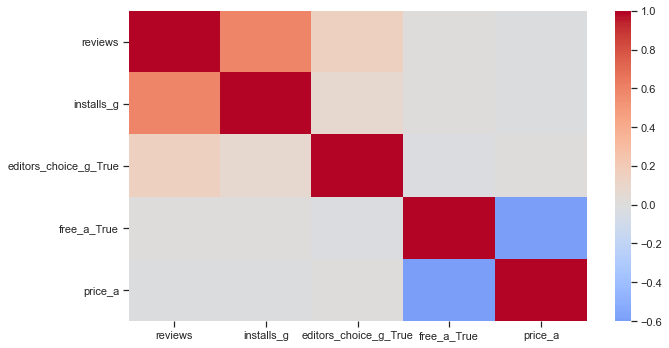

In [26]:
### Verifying Regression 1 Model Set-Up

dual_ind_vars = ['primary_genre_a', 'reviews', 'installs_g', 'editors_choice_g', 'free_a', 'price_a']
dual_cat_vars = ['primary_genre_a', 'editors_choice_g', 'free_a']
dual_heat_vars = ['reviews', 'installs_g', 'editors_choice_g_True','free_a_True', 'price_a']

dual_reg_setup = reg_model_setup(dual_ind_vars, dual_cat_vars, dual_heat_vars, dual_only)

[Note:] We do not include our `primary_genre_a` indicator variables in the correlation matrix as the dummy genre variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all dual support apps.

Next, we can run our all Dual Support apps regression outlined above to find the effect of our 6 independent variables: `primary_genre_a`, `reviews`, `installs_g`, `editors_choice_g`, `free_a`, and `price_a` on our `rating` variable.

From our data exploration (see above), we found that Apple ratings and Google ratings tended to be in agreement. Thus, here we define the `rating` of a dual supported app as the average of both its Apple and Google ratings:

$$rating = \frac{\text{average_user_rating_a} + \text{rating_g}}{2}$$

As a robustness check, we shall also consider an alternative definition of `rating` to be the maximum of the Apple and Google ratings for an app: 

$$rating_{alt} = max(\text{average_user_rating_a}, \text{rating_g})$$

We shall examine whether this change in definition makes a difference in our regression results. In theory, we expect this alternative definition should not make a big difference since we noticed that the Apple and Google ratings tended to be in agreement during our data exploration / visualization phase but we will verify this below.

**Rating Definition 1: Average of Apple and Google Ratings:**

In [27]:
# Convert Rating Variable to Average of Apple Rating and Google Rating
dual_reg_setup['rating'] = dual_only[['average_user_rating_a', 'rating_g']].mean(axis=1)

# Regress 7 independent variables on rating variable
dual_multi_model = LinearRegression()
dual_multi_model.fit(dual_reg_setup[dual_reg_setup.columns.drop('rating')], dual_reg_setup['rating'])

i=0

for c in dual_reg_setup.columns.drop('rating'):
    print (c.capitalize()+" Coefficient: ", round(dual_multi_model.coef_[i],3))
    i = i+1
    
print("\n")

print("Intercept: ", round(dual_multi_model.intercept_,3))

Reviews Coefficient:  0.0
Installs_g Coefficient:  0.0
Price_a Coefficient:  -0.011
Primary_genre_a_business Coefficient:  -0.474
Primary_genre_a_developer tools Coefficient:  0.349
Primary_genre_a_education Coefficient:  -0.289
Primary_genre_a_entertainment Coefficient:  -0.445
Primary_genre_a_finance Coefficient:  -0.023
Primary_genre_a_food & drink Coefficient:  -0.288
Primary_genre_a_games Coefficient:  -0.124
Primary_genre_a_graphics & design Coefficient:  -0.15
Primary_genre_a_health & fitness Coefficient:  -0.288
Primary_genre_a_lifestyle Coefficient:  -0.445
Primary_genre_a_magazines & newspapers Coefficient:  -0.145
Primary_genre_a_medical Coefficient:  -0.174
Primary_genre_a_music Coefficient:  -0.272
Primary_genre_a_navigation Coefficient:  -0.481
Primary_genre_a_news Coefficient:  -0.189
Primary_genre_a_photo & video Coefficient:  -0.475
Primary_genre_a_productivity Coefficient:  -0.411
Primary_genre_a_reference Coefficient:  0.018
Primary_genre_a_shopping Coefficient:  -0.

While our coefficients all seem relatively small upon first glance, it is important to remember that our ratings are out of a scale from 0.0-5.0. Thus, these coefficients seem to have a strong impact on the overall rating score of an dual support app. In particular, we notice that most app genres tend to have a negative effect on our user rating. This could be due to these app genre categories being less popular in comparison to genres like `developer_tools` = 0.349 and `stickers` = 0.333.

An interesting result, is that while `price_a` = -0.011 has a negative impact on user rating which makes sense since users most likely do not like paying for apps we also notice that the coefficient for `free_a` = -0.166. This is likely due to there being significantly more mediocre free apps on both App stores. Thus, we identify for app creators that there is a delicate balance between making an app free versus paid for, the key to customer satisfaction is highly correlated with users feeling they got the quality they paid for and deserve.

The variable that has the most positive impact on user ratings is `editors_choice_g` = 0.213. This makes sense as being an app selected by the editor's of the Google Play Store is a great signal to users that this app has been vouched for having good quality, reviews, and user experience so it is being promoted and recommended. While, it is not clear what kind of standards or rubric the editor's use to decide a great app from an average one, it is clear that having the editor's approval is crucial part of measuring app success that we have identified.

Surprisingly, `reviews` = 0.0 and `installs_g` = 0.0 seems to imply that the total number of reviews and total number of installs does not have much impact on an app's rating. This is a good sign for new app creators that just start off that the success of an app is not just a direct function of how many reviews your app has or how many people download your app but rather a function of more unique characteristics like genre and receiving the editor's stamp of approval.

**Rating Definition 2: Maximum of Apple and Google Ratings:**

In [28]:
# Convert Rating Variable to Max of Apple Rating and Google Rating

dual_reg_setup['rating'] = dual_only[['average_user_rating_a', 'rating_g']].max(axis=1)

# Regress 7 independent variables on rating variable
dual_multi_model = LinearRegression()
dual_multi_model.fit(dual_reg_setup[dual_reg_setup.columns.drop('rating')], dual_reg_setup['rating'])

i=0

for c in dual_reg_setup.columns.drop('rating'):
    print (c.capitalize()+" Coefficient: ", round(dual_multi_model.coef_[i],3))
    i = i+1
    
print("\n")

print("Intercept: ", round(dual_multi_model.intercept_,3))

Reviews Coefficient:  0.0
Installs_g Coefficient:  -0.0
Price_a Coefficient:  -0.007
Primary_genre_a_business Coefficient:  -0.331
Primary_genre_a_developer tools Coefficient:  0.235
Primary_genre_a_education Coefficient:  -0.243
Primary_genre_a_entertainment Coefficient:  -0.348
Primary_genre_a_finance Coefficient:  0.023
Primary_genre_a_food & drink Coefficient:  -0.153
Primary_genre_a_games Coefficient:  -0.091
Primary_genre_a_graphics & design Coefficient:  -0.064
Primary_genre_a_health & fitness Coefficient:  -0.205
Primary_genre_a_lifestyle Coefficient:  -0.338
Primary_genre_a_magazines & newspapers Coefficient:  0.114
Primary_genre_a_medical Coefficient:  -0.121
Primary_genre_a_music Coefficient:  -0.205
Primary_genre_a_navigation Coefficient:  -0.33
Primary_genre_a_news Coefficient:  -0.079
Primary_genre_a_photo & video Coefficient:  -0.286
Primary_genre_a_productivity Coefficient:  -0.305
Primary_genre_a_reference Coefficient:  0.008
Primary_genre_a_shopping Coefficient:  -0.0

With our alternate definition of `rating` as the maximum of Apple and Google ratings, we find that our regression results have slightly different numbers but describe almost the same behaviors. That is, we notice the more popular genres with postive impact are `developer_tools` = 0.235 and `stickers` = 0.302. The only difference is that taking the maximum rating and giving apps the benefit of the doubt leads to more genres with positive impact on the user rating: `finance` = 0.023, `magazines` = 0.114, and `reference` = 0.008. The addition of these categories matches common intuition that genres that support work efficiency and entertainment like `finance`, `reference`, and `magazines` have a larger user base and better support for nicer apps. However, to prove that the apps in these genres are of superior quality would require further analysis and a more rigorous definition of `app quality`. 

Overall, we see similar trends between `price_a` and `free_a` coefficients being negative and the `editors_choice_g` = 0.163 having the most positive impact on user ratings. Again, the total number of reviews and total number of installs does not seem to impact the app's user rating which is a promising sign for new app creators.

#### **Regression 2** - All Apple Apps

Our model would give us app `average_user_rating_a` as a function of our 5 independent variables: `primary_genre_a`, `reviews`,`free_a`, `price_a`, and `dual_support`.

$$\text{average_user_rating_a} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{free_a} + \beta_4 \text{price_a} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `primary_genre_a`, `free_a`, and `dual_support`. 

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically.

Correlation Matrix: 



,reviews,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,primary_genre_a_Graphics & Design,...,primary_genre_a_Reference,primary_genre_a_Shopping,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,free_a_True,dual_support_True
reviews,1.000000,-0.004931,-0.004047,-0.000668,-0.008136,-0.000831,-0.004347,0.002011,0.010241,-0.002326,...,-0.002956,0.001270,0.025325,-0.003945,-0.001528,0.001348,-0.005141,-0.001677,0.009141,0.056506
price_a,-0.004931,1.000000,0.004509,0.015005,0.035850,-0.010443,-0.024650,-0.013777,-0.032749,0.001225,...,0.022128,-0.021971,-0.012475,0.002247,-0.001026,-0.007696,0.005270,0.008190,-0.479336,-0.021958
primary_genre_a_Business,-0.004047,0.004509,1.000000,-0.004294,-0.042945,-0.042034,-0.048184,-0.024007,-0.126763,-0.011644,...,-0.023686,-0.030330,-0.026287,-0.024066,-0.006262,-0.025137,-0.043912,-0.016418,0.016836,0.034368
primary_genre_a_Developer Tools,-0.000668,0.015005,-0.004294,1.000000,-0.005947,-0.005821,-0.006673,-0.003325,-0.017556,-0.001613,...,-0.003280,-0.004200,-0.003640,-0.003333,-0.000867,-0.003481,-0.006081,-0.002274,-0.013871,-0.013004
primary_genre_a_Education,-0.008136,0.035850,-0.042945,-0.005947,1.000000,-0.058216,-0.066734,-0.033249,-0.175562,-0.016127,...,-0.032805,-0.042006,-0.036406,-0.033331,-0.008673,-0.034814,-0.060817,-0.022739,-0.043421,-0.026300
primary_genre_a_Entertainment,-0.000831,-0.010443,-0.042034,-0.005821,-0.058216,1.000000,-0.065319,-0.032543,-0.171839,-0.015785,...,-0.032109,-0.041115,-0.035634,-0.032624,-0.008489,-0.034076,-0.059527,-0.022257,0.009601,-0.026992
primary_genre_a_Finance,-0.004347,-0.024650,-0.048184,-0.006673,-0.066734,-0.065319,1.000000,-0.037305,-0.196983,-0.018095,...,-0.036807,-0.047131,-0.040848,-0.037398,-0.009731,-0.039062,-0.068237,-0.025513,0.058483,0.087928
primary_genre_a_Food & Drink,0.002011,-0.013777,-0.024007,-0.003325,-0.033249,-0.032543,-0.037305,1.000000,-0.098142,-0.009015,...,-0.018338,-0.023482,-0.020352,-0.018633,-0.004848,-0.019461,-0.033997,-0.012711,0.024947,0.021466
primary_genre_a_Games,0.010241,-0.032749,-0.126763,-0.017556,-0.175562,-0.171839,-0.196983,-0.098142,1.000000,-0.047603,...,-0.096831,-0.123992,-0.107462,-0.098385,-0.025600,-0.102763,-0.179516,-0.067119,0.000249,0.037192
primary_genre_a_Graphics & Design,-0.002326,0.001225,-0.011644,-0.001613,-0.016127,-0.015785,-0.018095,-0.009015,-0.047603,1.000000,...,-0.008895,-0.011390,-0.009871,-0.009038,-0.002352,-0.009440,-0.016490,-0.006166,0.004285,-0.030789


Heat Map Visualization: 



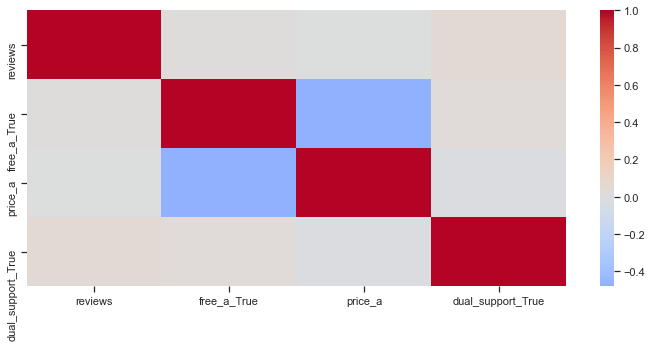

In [29]:
### Verifying Regression 2 Model Set-Up

apple_ind_vars = ['primary_genre_a', 'reviews', 'free_a', 'price_a', 'dual_support']
apple_cat_vars = ['primary_genre_a', 'free_a', 'dual_support']
apple_heat_vars = ['reviews', 'free_a_True', 'price_a', 'dual_support_True']

all_apple_reg_setup = reg_model_setup(apple_ind_vars, apple_cat_vars, apple_heat_vars, all_apple)

[Note:] We do not include our `primary_genre_a` indicator variables in the correlation matrix as the dummy genre variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all Apple apps.

Next, we can run our all Apple apps regression outlined above to find the effect of our 5 independent variables: `primary_genre_a`, `reviews`,`free_a`, `price_a`, and `dual_support` on our `average_user_rating_a` variable.

In [30]:
## Adding `average_user_rating_a` variable to regression dataset after checking collinearity
all_apple_reg_setup['average_user_rating_a'] = all_apple['average_user_rating_a']

## Identify Problematic Apps with Price = NaN Values
display(all_apple_reg_setup[all_apple_reg_setup.isna().any(axis=1)])

## Dropping any Apple Apps that Don't Have a Price Value from Analysis
all_apple_reg_setup = all_apple_reg_setup.dropna()

,reviews,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,primary_genre_a_Graphics & Design,...,primary_genre_a_Shopping,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,free_a_True,dual_support_True,average_user_rating_a
118,735.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.19456
1238,185.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.05405
1343,14746.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.81839
4178,804.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.40174
5263,558.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.19534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45699,105.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.85714
47151,3986.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.80958
49364,190.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.99474
50439,152.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.56578


Here, before running our linear regression we pre-identify any problematic apps that contain NaN values and drop those Apple apps before we run our regression since a linear regression cannot understand and predict `average_user_rating_a` from any variables with NaN values.

In [31]:
# Regress 5 independent variables on average_user_rating_a variable
apple_multi_model = LinearRegression()
apple_multi_model.fit(all_apple_reg_setup[all_apple_reg_setup.columns.drop('average_user_rating_a')], all_apple_reg_setup['average_user_rating_a'])

i=0

for c in all_apple_reg_setup.columns.drop('average_user_rating_a'):
    print (c.capitalize()+" Coefficient: ", round(apple_multi_model.coef_[i],3))
    i = i+1
    
#print(dual_multi_model.coef_)
print("\n")

print("Intercept: ", round(apple_multi_model.intercept_,3))

Reviews Coefficient:  0.0
Price_a Coefficient:  0.002
Primary_genre_a_business Coefficient:  -0.24
Primary_genre_a_developer tools Coefficient:  -0.103
Primary_genre_a_education Coefficient:  -0.157
Primary_genre_a_entertainment Coefficient:  -0.362
Primary_genre_a_finance Coefficient:  0.047
Primary_genre_a_food & drink Coefficient:  -0.043
Primary_genre_a_games Coefficient:  -0.113
Primary_genre_a_graphics & design Coefficient:  -0.012
Primary_genre_a_health & fitness Coefficient:  -0.031
Primary_genre_a_lifestyle Coefficient:  -0.194
Primary_genre_a_magazines & newspapers Coefficient:  0.063
Primary_genre_a_medical Coefficient:  -0.067
Primary_genre_a_music Coefficient:  -0.163
Primary_genre_a_navigation Coefficient:  -0.195
Primary_genre_a_news Coefficient:  -0.06
Primary_genre_a_photo & video Coefficient:  -0.175
Primary_genre_a_productivity Coefficient:  -0.193
Primary_genre_a_reference Coefficient:  -0.039
Primary_genre_a_shopping Coefficient:  0.064
Primary_genre_a_social netwo

We notice that as with our dual supported apps above, the primary genre of app typically has a negative impact on an app's user rating with the exception of `finance` = 0.047, `magazines` = 0.063, and `shopping` = 0.064. While the `finance` genre having a positive impact aligns with our previous findings for `dual support` apps, the addition of `magazines` and `shopping` genres seems to reveal that Apple app users in particular have a higher preference for entertainment and shopping apps as opposed to just traditional productivity apps. This preference towards entertainment and enjoyment is important for app creators to take note of as they decide what apps to create and how to market their apps to the general Apple user base.

Here, surprisingly we notice that the `price_a` = 0.002 has a positive impact whereas `free_a` = -0.042 has a negative impact which seems to reveal that Apple users prefer to pay for better quality apps as opposed to just downloading and using whatever app is free. This is crucial for app creators when deciding how much effort to put into their app designs and how accessible they want to be with their app pricing.

Also, we notice that `dual_support` = -0.099 has a negative impact on user rating which surprisingly reveals perhaps having dual support is not of much importance for Apple users. This could be interpreted as Apple users having a strong preference for staying within the Apple ecosystem so the flexibility of having Google support does not provide much additional benefit for users. Thus, app creators might want to take note of this and not expend a large amount of energy providing a Google complement version of their app if their goal is to only target Apple users.

#### **Regression 3** - All Google Apps

Our model would give us app `rating_g` as a function of our 5 independent variables: `category_g`, `reviews`, `installs_g`, `editors_choice_g`, and `dual_support`.

$$\text{rating_g} = \beta_1 \text{category_g} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `category_g`, `editors_choice_g`, and `dual_support`.

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically.

Correlation Matrix: 



,reviews,installs_g,category_g_Adventure,category_g_Arcade,category_g_Art & Design,category_g_Auto & Vehicles,category_g_Beauty,category_g_Board,category_g_Books & Reference,category_g_Business,...,category_g_Sports,category_g_Strategy,category_g_Tools,category_g_Travel & Local,category_g_Trivia,category_g_Video Players & Editors,category_g_Weather,category_g_Word,editors_choice_g_True,dual_support_True
reviews,1.000000,0.534926,0.000177,0.004361,-0.001640,-0.001877,-0.001207,0.000284,-0.005928,-0.002750,...,0.001185,0.009781,-0.001096,-0.001327,-0.000477,0.007317,-0.000857,0.000524,0.135398,0.051876
installs_g,0.534926,1.000000,-0.001322,0.003011,-0.001308,-0.000912,-0.000889,-0.000137,-0.005299,-0.002564,...,-0.001200,0.000670,0.009350,0.000863,-0.001392,0.008333,-0.000276,-0.000700,0.058887,0.027782
category_g_Adventure,0.000177,-0.001322,1.000000,-0.020080,-0.011306,-0.011626,-0.007148,-0.012147,-0.033651,-0.022616,...,-0.022547,-0.013064,-0.040740,-0.020465,-0.011707,-0.015780,-0.012360,-0.011552,0.008075,0.003165
category_g_Arcade,0.004361,0.003011,-0.020080,1.000000,-0.011116,-0.011431,-0.007028,-0.011944,-0.033087,-0.022237,...,-0.022169,-0.012845,-0.040057,-0.020123,-0.011511,-0.015516,-0.012153,-0.011359,0.000670,0.030698
category_g_Art & Design,-0.001640,-0.001308,-0.011306,-0.011116,1.000000,-0.006436,-0.003957,-0.006725,-0.018629,-0.012520,...,-0.012482,-0.007232,-0.022553,-0.011329,-0.006481,-0.008736,-0.006842,-0.006395,0.000533,-0.011975
category_g_Auto & Vehicles,-0.001877,-0.000912,-0.011626,-0.011431,-0.006436,1.000000,-0.004069,-0.006915,-0.019157,-0.012875,...,-0.012836,-0.007437,-0.023192,-0.011651,-0.006664,-0.008983,-0.007036,-0.006576,-0.003173,-0.005552
category_g_Beauty,-0.001207,-0.000889,-0.007148,-0.007028,-0.003957,-0.004069,1.000000,-0.004251,-0.011778,-0.007915,...,-0.007891,-0.004572,-0.014259,-0.007163,-0.004097,-0.005523,-0.004326,-0.004043,-0.000122,-0.006970
category_g_Board,0.000284,-0.000137,-0.012147,-0.011944,-0.006725,-0.006915,-0.004251,1.000000,-0.020016,-0.013452,...,-0.013411,-0.007770,-0.024232,-0.012173,-0.006963,-0.009386,-0.007352,-0.006871,-0.002709,0.006804
category_g_Books & Reference,-0.005928,-0.005299,-0.033651,-0.033087,-0.018629,-0.019157,-0.011778,-0.020016,1.000000,-0.037265,...,-0.037152,-0.021526,-0.067130,-0.033722,-0.019290,-0.026002,-0.020366,-0.019035,-0.009435,-0.037360
category_g_Business,-0.002750,-0.002564,-0.022616,-0.022237,-0.012520,-0.012875,-0.007915,-0.013452,-0.037265,1.000000,...,-0.024968,-0.014467,-0.045115,-0.022663,-0.012964,-0.017475,-0.013687,-0.012793,-0.003882,0.013735


Heat Map Visualization: 



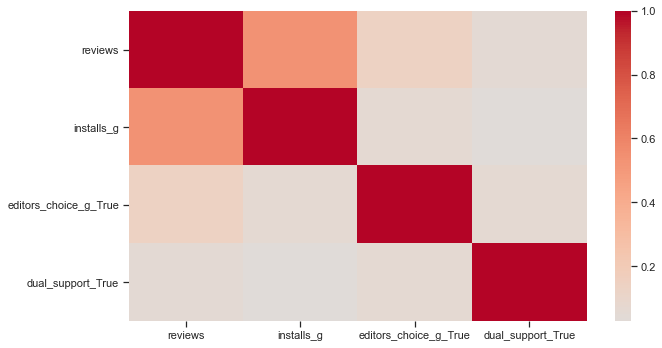

In [32]:
### Verifying Regression 3 Model Set-Up

google_ind_vars = ['category_g', 'reviews', 'installs_g', 'editors_choice_g', 'dual_support']
google_cat_vars = ['category_g', 'editors_choice_g', 'dual_support']
google_heat_vars = ['reviews', 'installs_g', 'editors_choice_g_True', 'dual_support_True']

all_google_reg_setup = reg_model_setup(google_ind_vars, google_cat_vars, google_heat_vars, all_google)

[Note:] We do not include our `category_g` indicator variables in the correlation matrix as the dummy category variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all Google apps.

Next, we can run our all Google apps regression outlined above to find the effect of our 5 independent variables: `category_g`, `reviews`, `installs_g`, `editors_choice_g`, `dual_support` on our `rating_g` variable.

In [33]:
## Adding `rating_g` variable to regression dataset after checking collinearity
all_google_reg_setup['rating_g'] = all_google['rating_g']

# Regress 5 independent variables on average_user_rating_a variable
google_multi_model = LinearRegression()
google_multi_model.fit(all_google_reg_setup[all_google_reg_setup.columns.drop('rating_g')], all_google_reg_setup['rating_g'])

i=0

for c in all_google_reg_setup.columns.drop('rating_g'):
    print (c.capitalize()+" Coefficient: ", round(google_multi_model.coef_[i],3))
    i = i+1

print("\n")
print("Intercept: ", round(google_multi_model.intercept_,3))

Reviews Coefficient:  0.0
Installs_g Coefficient:  0.0
Category_g_adventure Coefficient:  0.097
Category_g_arcade Coefficient:  0.067
Category_g_art & design Coefficient:  0.117
Category_g_auto & vehicles Coefficient:  -0.076
Category_g_beauty Coefficient:  0.063
Category_g_board Coefficient:  0.114
Category_g_books & reference Coefficient:  0.417
Category_g_business Coefficient:  -0.083
Category_g_card Coefficient:  0.145
Category_g_casino Coefficient:  0.3
Category_g_casual Coefficient:  0.054
Category_g_comics Coefficient:  0.03
Category_g_communication Coefficient:  0.017
Category_g_dating Coefficient:  0.009
Category_g_education Coefficient:  0.228
Category_g_educational Coefficient:  0.14
Category_g_entertainment Coefficient:  0.009
Category_g_events Coefficient:  0.159
Category_g_finance Coefficient:  -0.022
Category_g_food & drink Coefficient:  0.082
Category_g_health & fitness Coefficient:  0.054
Category_g_house & home Coefficient:  -0.205
Category_g_libraries & demo Coeffici

We notice here in contrast with our first two regressions of Dual Supported Apps and All Apple apps, that Google Apps are positively impacted by the category / genre the app falls under. Thus, we can infer that perhaps Google Play Store users place more value and significance on what category the app they download belongs to when evaluating their overall user experience and giving a rating. Since both the Dual Supported apps and All Apple apps contained Apple apps, we can interpret the negative genre coefficients as a unique characteristic of Apple app user rating behaviors.

Once again, we notice that `reviews`= 0.0 and `installs_g` = 0.0 which reveals that the total number of reviews and total number of installs has less of an importance to a user when deciding on a user rating. This makes sense as a user is likely giving their rating based upon their own feedback and experience which is independent of how many reviews and installs they already see the app has. We also observe that `editors_choice_g` = 0.302 has a strong positive impact on the app's user rating which makes sense as discussed above.

Surprisingly, we find that `dual_support` = 0.087 has a positive impact which is the opposite from our All Apple apps regression. Thus, we find that perhaps for Google users flexibility between both platforms is more valued than to Apple users which is important for app creators to keep in mind.

### Principal Component Analysis / Visualization

To motivate our second K-Means Clustering analyses, we shall first use Principal Component Analysis to reduce the dimensionality of our `all_apple` and `all_google` sub-dataframes into 2 dimensions in order to visualize the shape of our data by their `dual_support` status. By examining the resulting PCA scatterplots, we can visually identify if there are two distinct clusters separating non-dual supported and dual supported apps or if there are observable differences between the types of apps. If so, these PCA graphs provide support that we shall be able to accurately cluster by `dual_support` status due to key differences in app characteristics across the two groups which we can further explore later in our K-Means clustering analysis section below.

#### PCA Visualization - All Apple Apps

In [34]:
## Setting up and fitting PCA to Apple Apps

pca = PCA(n_components=2)
p_trans_a = pca.fit_transform(all_apple_reg_setup)

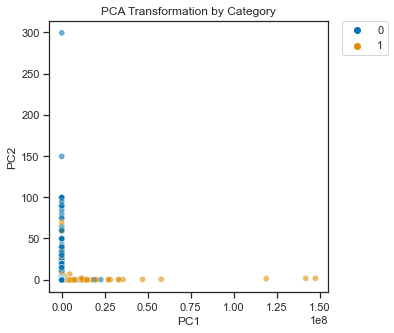

In [35]:
## Plotting All Apple PCA Graph

plt.figure(figsize=(5,5))
sns.scatterplot(x = p_trans_a[:, 0], y = p_trans_a[:, 1], alpha = 0.6, hue = all_apple_reg_setup['dual_support_True'])
plt.title("PCA Transformation by Category")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From our graph above, we notice that non-dual supported apps (in blue) seem to correspond more highly with our second principal component `PC2` whereas `dual_support` apps (in orange) seem to correspond more highly with our first principal component `PC1`. Observing the kink in our plot, we can infer there must be key differences in app characteristics between the Apple non-dual and dual apps which motivates further analysis by K-Means clustering later.

#### PCA Visualization - All Google Apps

In [36]:
## Fitting PCA to Google Apps
p_trans_g = pca.fit_transform(all_google_reg_setup)

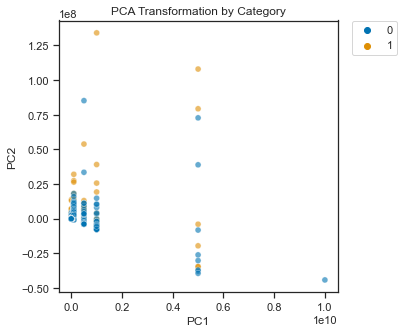

In [37]:
## Plotting All Google PCA Graph

plt.figure(figsize=(5,5))
sns.scatterplot(x = p_trans_g[:, 0], y = p_trans_g[:, 1], alpha = 0.6, hue = all_google_reg_setup['dual_support_True'])
plt.title("PCA Transformation by Category")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the graph above, we notice for any level of the first principal component `PC1` the non-dual supported apps (in blue) have lower second principal component `PC2` values than the `dual_support` apps (in orange). This difference in `PC2` signals there must be certain key app characteristics distinguishing Google non-dual and dual apps which motivates further analysis by K-Means clustering later. 

### K-Means Cluster Analysis

We want to implement a K-Means Cluster Analysis to predict which apps are dual supported within Apple apps and Google apps separately.

1. Apple apps dataframe (minus `dual_support` column which has true label) -> cluster into $K=2$ clusters to predict what Apple Specific characteristics are crucial to predicting the dual support status of apps.
2. Google apps dataframe (minus `dual_support` column which has true label) -> cluster into $K=2$ clusters to predict what Google Specific characteristics are crucial to predicting the dual support status of apps.

We will be able to compare the results of our K-Means clustering to their true labels (`dual_support` column) to see how accurate our prediction model is and generalize the findings of what groups of characteristics define a dual supported app to compare if there is any differentiation in terms of app quality that help them stand apart. In terms of real world applications, our findings of what typical non-categorical characteristics define a `dual_support` app can help app creators better understand relationships between specific app attributes that correlate with whether or not an app has multi-platform support and what impact that has on overall app quality and overall success.

#### All Apple Apps

We will attempt to predict which apps have `dual_support` feature given the same 4 independent characteristics (`primary_genre_a`, `reviews`,`free_a`, `price_a`) from our regression model above and see how accurate our clustering is by comparing to the true labels, `dual_support` column. We shall later calculate the percentage of accuracy of our cluster label predictions to interpret how important these  key variables are to identifying `dual_support` apps from non-dual supported apps and what that means for app creators.

In [38]:
## Note: Acknowledge Code Modified from HW Clustering Example

cluster_apple = all_apple_reg_setup.copy()

## initialize a KMeans object
clustering = KMeans(n_clusters = 2, random_state = 1)

## execute the KMeans algorithm on all Apple apps ratings
clustering.fit(cluster_apple[cluster_apple.columns.drop('dual_support_True')])

print("The Cluster Centers Array: \n", clustering.cluster_centers_)

The Cluster Centers Array: 
 [[4.00953919e+04 3.86704378e-01 3.01293598e-02 5.95441892e-04
  5.62394867e-02 5.40065796e-02 6.97857898e-02 1.82800661e-02
  3.40190839e-01 4.36161186e-03 4.61616327e-02 4.54917606e-02
  6.84758176e-04 1.61364753e-02 2.47406106e-02 8.05335159e-03
  1.92030010e-02 4.51791536e-02 3.47142623e-02 1.78037126e-02
  2.88640457e-02 2.18080593e-02 1.83693824e-02 1.26531402e-03
  2.00068476e-02 5.86510264e-02 8.63390744e-03 9.26522470e-01
  4.38521685e+00]
 [1.36228408e+08 5.55111512e-17 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.93889390e-18 6.93889390e-18
  1.08420217e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.33333333e-01 6.93889390e-18 0.00000000e+00
  3.46944695e-18 6.66666667e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.88153667e+00]]


In [39]:
## Adding Cluster Labels to Dataframe

cluster_labels_a = clustering.labels_

cluster_apple["cluster_label"] = cluster_labels_a
cluster_apple.head()

,reviews,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,primary_genre_a_Graphics & Design,...,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,free_a_True,dual_support_True,average_user_rating_a,cluster_label
0,168.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4.49404,0
1,179.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4.41899,0
2,220.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,4.90909,0
3,20681.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3.69302,0
4,591.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4.66667,0


In [40]:
## Mapping Cluster Labels

predicted_dual_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_dual_support": [False, True]})
predicted_dual_lookup.head()

,cluster_label,predicted_dual_support
0,0,False
1,1,True


In [41]:
## Merging Dataframes on Cluster Label to Compare Accuracy

apple_predict = pd.merge(cluster_apple, predicted_dual_lookup, on = "cluster_label")
n_row_aclean = cluster_apple.shape[0]
n_row_apredict = apple_predict.shape[0]
check = (n_row_aclean == n_row_apredict)

print("Was the join performed correctly? {}".format(check))
print("\n")
print("Number of Rows Apple_Predict: {:}".format(n_row_apredict))
print("\n")
apple_predict.head()

Was the join performed correctly? True


Number of Rows Apple_Predict: 67180




,reviews,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,primary_genre_a_Graphics & Design,...,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,free_a_True,dual_support_True,average_user_rating_a,cluster_label,predicted_dual_support
0,168.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,4.49404,0,False
1,179.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,4.41899,0,False
2,220.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,4.90909,0,False
3,20681.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,3.69302,0,False
4,591.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,4.66667,0,False


In [42]:
## Calculating Percentage Accuracy of Cluster Label Prediction

pcorrect = apple_predict[(apple_predict["dual_support_True"] == apple_predict["cluster_label"])].shape[0]
accuracy = pcorrect / n_row_apredict * 100

print("Accuracy Percentage is: {:.1f}%".format(accuracy))

Accuracy Percentage is: 74.1%


We observe that our accuracy percentage = 74.1\% is relatively high overall for predicting the `dual_support` status app based on our 4 independent variables: `primary_genre_a`, `reviews`,`free_a`, `price_a`. While by itself our clustering analysis accuracy percentage does not provide a lot of additional information to app creators, we can further analyze which top app characteristics motivated the cluster predictions and the importance of these results.

In [43]:
## Understanding Important Features per Cluster Label (Dual Support / No Dual Support)

cluster_apple2 = all_apple_reg_setup.drop('dual_support_True', axis=1)

kms_a = KMeansInterp(
    n_clusters=2,
    ordered_feature_names=cluster_apple2.columns.tolist(), 
    feature_importance_method= 'wcss_min', # or 'unsup2sup'
).fit(cluster_apple2.values)

print("Key Characteristics for Predicting No Dual Support Feature: \n")
display(kms_a.feature_importances_[0][:5])
print("\n")
print("Key Characteristics for Predicting Dual Support Feature: \n")
display(kms_a.feature_importances_[1][:5])

Key Characteristics for Predicting No Dual Support Feature: 



[('reviews', 40095.39189007529),
 ('average_user_rating_a', 4.385216851303273),
 ('free_a_True', 0.9265224704884161),
 ('price_a', 0.3867043779865539),
 ('primary_genre_a_Games', 0.34019083912650216)]



Key Characteristics for Predicting Dual Support Feature: 



[('reviews', 136228407.66666666),
 ('average_user_rating_a', 3.881536666666667),
 ('free_a_True', 1.0),
 ('primary_genre_a_Social Networking', 0.6666666666666666),
 ('primary_genre_a_Photo & Video', 0.33333333333333337)]

Here, we find that sorting feature importance by Within Cluster Sum of Squares (WCSS) method we can identify the top 5 app characteristics that were key to predicting whether an app has `dual_support` feature or not. From our results above, we can tell from the reported features and their respective centroids that `reviews` and `average_user_rating_a` were the top 2 app characteristics used to distinguish apps with dual support from those without dual support. 

An interesting result is that apps with no dual support seem to have a lower number of `reviews` $\approx 40,095 < 136,228,407 \approx$ `reviews` of apps with dual support. However, they had a higher rating $\approx 4.39 > 3.88 \approx$ rating of apps with dual support. These results support our previous linear regression model findings that `dual_support` had a negative impact to user ratings. Thus, if our clustering also identifies `dual_support` by lower ratings then this is important for Apple app creators to know when deciding whether or not to spend the extra effort to provide dual platform support.

#### All Google Apps

We will attempt to predict which apps have `dual_support` feature given the same 4 independent characteristics (`category_g`, `reviews`, `installs_g`, `editors_choice_g`) from our regression model above and see how accurate our clustering is by comparing to the true labels, `dual_support` column. We shall later calculate the percentage of accuracy of our cluster label predictions to interpret how important these  key variables are to identifying `dual_support` apps from non-dual supported apps and what that means for app creators.

In [44]:
## Note: Acknowledge Code Modified from HW Clustering Example

cluster_google = all_google_reg_setup.copy()

## initialize a KMeans object
clustering = KMeans(n_clusters = 2, random_state = 1)

## execute the KMeans algorithm on all Apple apps ratings
clustering.fit(cluster_google[cluster_google.columns.drop('dual_support_True')])

print("The Cluster Centers Array: \n", clustering.cluster_centers_)

The Cluster Centers Array: 
 [[ 1.62841791e+04  8.31855372e+05  2.00143208e-02  1.93624059e-02
   6.21990905e-03  6.57525609e-03  2.49544461e-03  7.17373531e-03
   5.25379259e-02  2.44334486e-02  7.46495958e-03  5.63211696e-03
   2.72414917e-02  2.42063471e-03  1.92154579e-02  4.11988821e-03
   8.50214544e-02  1.13363720e-02  7.07327630e-02  1.11680498e-03
   3.89251954e-02  1.02543002e-02  2.35945090e-02  3.10193918e-03
   2.03322628e-03  4.15061371e-02  1.35592949e-02  9.37528388e-03
   3.12064166e-03  5.32165586e-02  1.93837801e-02  2.10002084e-03
   5.06222581e-02  2.14357089e-02  2.78506581e-02  2.89354016e-02
   1.01046804e-02  1.44302959e-02  2.04124163e-02  3.03754923e-02
   2.05139440e-02  2.42891723e-02  8.28786851e-03  7.51545626e-02
   2.00944742e-02  6.66609669e-03  1.20417226e-02  7.42488284e-03
   6.49243084e-03  2.24964065e-03  4.02181377e+00]
 [ 4.12029547e+07  5.33333333e+09 -3.46944695e-18  0.00000000e+00
   8.67361738e-19  2.60208521e-18  0.00000000e+00  1.73472348e

In [45]:
## Adding Cluster Labels to Dataframe

cluster_labels_g = clustering.labels_

cluster_google["cluster_label"] = cluster_labels_g
cluster_google.head()

,reviews,installs_g,category_g_Adventure,category_g_Arcade,category_g_Art & Design,category_g_Auto & Vehicles,category_g_Beauty,category_g_Board,category_g_Books & Reference,category_g_Business,...,category_g_Tools,category_g_Travel & Local,category_g_Trivia,category_g_Video Players & Editors,category_g_Weather,category_g_Word,editors_choice_g_True,dual_support_True,rating_g,cluster_label
3,20681.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.0,0
9,42627.0,1000000.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,4.4,0
10,167879.0,5000000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.6,0
11,9341.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.6,0
12,161733.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.3,0


In [46]:
## Mapping Cluster Labels

predicted_dual_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_dual_support": [False, True]})
predicted_dual_lookup.head()

,cluster_label,predicted_dual_support
0,0,False
1,1,True


In [47]:
## Merging Dataframes on Cluster Label to Compare Accuracy

google_predict = pd.merge(cluster_google, predicted_dual_lookup, on = "cluster_label")
n_row_aclean = cluster_google.shape[0]
n_row_apredict = google_predict.shape[0]
check = (n_row_aclean == n_row_apredict)

print("Was the join performed correctly? {}".format(check))
print("\n")
print("Number of Rows Google_Predict: {:}".format(n_row_apredict))
print("\n")
google_predict.head()

Was the join performed correctly? True


Number of Rows Google_Predict: 374297




,reviews,installs_g,category_g_Adventure,category_g_Arcade,category_g_Art & Design,category_g_Auto & Vehicles,category_g_Beauty,category_g_Board,category_g_Books & Reference,category_g_Business,...,category_g_Travel & Local,category_g_Trivia,category_g_Video Players & Editors,category_g_Weather,category_g_Word,editors_choice_g_True,dual_support_True,rating_g,cluster_label,predicted_dual_support
0,20681.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4.0,0,False
1,42627.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4.4,0,False
2,167879.0,5000000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4.6,0,False
3,9341.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4.6,0,False
4,161733.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4.3,0,False


In [48]:
## Calculating Percentage Accuracy of Cluster Label Prediction

pcorrect = google_predict[(google_predict["dual_support_True"] == google_predict["cluster_label"])].shape[0]
accuracy = pcorrect / n_row_apredict * 100

print("Accuracy Percentage is: {:.1f}%".format(accuracy))

Accuracy Percentage is: 95.4%


We observe that our accuracy percentage = 95.4\% is very high overall for predicting the `dual_support` status app based on our 4 independent variables: `category_g`, `reviews`, `installs_g`, `editors_choice_g`. This is a good sign that there are key app characteristics that make it easy to identify / predict the `dual_support` feature status of apps. While by itself our clustering analysis accuracy percentage does not add much extra insight for app creators, we can further analyze which top app characteristics motivated the cluster predictions and the importance of these results.

In [49]:
## Understanding Important Features per Cluster Label (Dual Support / No Dual Support)

cluster_google2 = all_google_reg_setup.drop('dual_support_True', axis=1)

kms_g = KMeansInterp(
    n_clusters = 2,
    ordered_feature_names = cluster_google2.columns.tolist(), 
    feature_importance_method= 'wcss_min', # or 'unsup2sup'
).fit(cluster_google2.values)

print("Key Characteristics for Predicting No Dual Support Feature: \n")
display(kms_g.feature_importances_[0][:5])
print("\n")
print("Key Characteristics for Predicting Dual Support Feature: \n")
display(kms_g.feature_importances_[1][:5])

Key Characteristics for Predicting No Dual Support Feature: 



[('installs_g', 831855.3723007112),
 ('reviews', 16284.179057511708),
 ('rating_g', 4.021813766090796),
 ('category_g_Education', 0.08502145441138625),
 ('category_g_Tools', 0.07515456260253696)]



Key Characteristics for Predicting Dual Support Feature: 



[('installs_g', 5333333333.333334),
 ('reviews', 41202954.733333334),
 ('rating_g', 4.02),
 ('category_g_Communication', 0.33333333333333326),
 ('category_g_Tools', 0.26666666666666666)]

Similarly, we find here that sorting feature importance by Within Cluster Sum of Squares (WCSS) method we can identify the top 5 app characteristics that were key to predicting whether an app has `dual_support` feature or not. From our results above, we can tell from the reported features and their respective centroids that `installs_g`, `reviews`, and `rating_g` were the top 3 app characteristics used to distinguish apps with dual support from those without dual support. 

An interesting result is that apps with no dual support seem to have a lower number of `installs_g` $\approx 831,855 < 5,333,333,333 \approx$ `installs_g` of apps with dual support. Also, apps with no dual support seem to have less number of `reviews` $\approx 16,284 < 41,202,954 \approx$ `reviews` for apps with dual support despite both having similar ratings around 4.02. Thus, we can infer that Google apps with `dual_support` feature seem to have larger user base with a significantly larger amount of installs and reviews compared to those that do not have dual support. The greater support for apps with dual support is a positive sign that Google app users value `dual_support` as an important app characteristic which is important for app creators to consider when attempting to measure app success. These findings also align with our findings from our linear regression model above which showed that `dual_support` had a positive impact on user ratings which could mean that Google users value and reward apps for the additional provided flexibility between Apple and Google platforms.

### Evaluation of Significance

To evaluate the significance of our Multivariable Regression models findings, we can use **F-tests for Overall Significance** to identify if it is possible to arrive at the same conclusions by chance:

#### **Regression 1** - Dual Support Only Apps

We defined our model above as:

$$\text{rating} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{free_a} + \beta_6 \text{price_a} + \beta_0 + X + \epsilon$$

For our F-Test, we have:

**Null Hypothesis:** 
$$H_0: \ \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = 0$$

That is, all our app characteristics of interest have no impact on user ratings.

**Alternative Hypothesis:** At least one coefficient in $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6 \}$ is greater than zero and has an impact on ratings not by random chance.

In [50]:
## Performing F-Test

dual_ols = dual_only.copy()

dual_ols['rating'] = dual_only[['average_user_rating_a', 'rating_g']].max(axis=1)

dual_model = sm.ols("rating ~ primary_genre_a + reviews + installs_g + editors_choice_g + free_a + price_a", dual_ols).fit()

#print(dual_model.summary())

print("F-Statistic: ", round(dual_model.fvalue,3))
print("F-Test p-value: ", dual_model.f_pvalue)

F-Statistic:  37.91
F-Test p-value:  1.1145915049418365e-212


We notice that our F-Test p-value $\approx 1.11 \cdot 10^{-212}$ which is incredibly small and less than significance level of $\alpha = 0.01$. Thus, we can successfully reject the Null Hypothesis that none of our coefficients have any impact on our `ratings` variable. Thus, we have proven at least one of our coefficients is non-zero not by random chance which supports that our findings above did not occur by random chance.

#### **Regression 2** - All Apple Apps

We defined our model above as:

$$\text{average_user_rating_a} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{free_a} + \beta_4 \text{price_a} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

For our F-Test, we have:

**Null Hypothesis:** 
$$H_0: \ \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = 0$$

That is, all our app characteristics of interest have no impact on user ratings.

**Alternative Hypothesis:** At least one coefficient in $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ is greater than zero and has an impact on ratings not by random chance.

In [51]:
## Performing F-Test

apple_model = sm.ols("average_user_rating_a ~ primary_genre_a + reviews + free_a + price_a + dual_support", all_apple).fit()

#print(apple_model.summary())

print("F-Statistic: ", round(apple_model.fvalue,3))
print("F-Test p-value: ", apple_model.f_pvalue)

F-Statistic:  81.886
F-Test p-value:  0.0


We notice that our F-Test $p$-value = 0.0 which is incredibly small and less than significance level of $\alpha = 0.01$. Thus, we can successfully reject the Null Hypothesis that none of our coefficients have any impact on our `ratings` variable. Thus, we have proven at least one of our coefficients is non-zero not by random chance which supports that our findings above did not occur by random chance.

#### **Regression 3** - All Google Apps

We defined our model above as:

$$\text{rating_g} = \beta_1 \text{category_g} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

For our F-Test, we have:

**Null Hypothesis:** 
$$H_0: \ \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = 0$$

That is, all our app characteristics of interest have no impact on user ratings.

**Alternative Hypothesis:** At least one coefficient in $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ is greater than zero and has an impact on ratings not by random chance.

In [52]:
## Performing F-Test

google_model = sm.ols("rating_g ~ category_g + reviews + installs_g + editors_choice_g + dual_support", all_google).fit()

#print(google_model.summary())

print("F-Statistic: ", round(google_model.fvalue,3))
print("F-Test p-value: ", google_model.f_pvalue)

F-Statistic:  447.419
F-Test p-value:  0.0


We notice that our F-Test $p$-value = 0.0 which is incredibly small and less than significance level of $\alpha = 0.01$. Thus, we can successfully reject the Null Hypothesis that none of our coefficients have any impact on our `ratings` variable. Thus, we have proven at least one of our coefficients is non-zero not by random chance which supports that our findings above did not occur by random chance.

#### F-Tests Results Summary

Summarizing, we have successfully conducted F-Tests on all 3 Multivariable Linear Regression models and successfully rejected the Null Hypothesis that all our coefficients have no impact on user ratings. This substantiates that our findings above are not due to random chance and our $R^2$ values are significantly different from zero.

[Note:] We realize the limitation of F-Tests of Overall Significance only prove that it is not possible for **all** our independent variables of interest to have zero impact in predicting user ratings. However, if the alternative hypothesis proves **at least** one independent variable predicts user ratings not by random chance we can infer by the research context that it makes sense and is highly likely more independent variables' predictions are not by chance in our regression models.

### Interpretation and Conclusions

#### Summary of Multivariable Linear Regression Models Findings

Thus, after setting-up each of our 3 multivariable linear regression models and checking for any instances of collinearity we conclude that we could safely use our regression equation models stated above. Then, we proceeded to run our 3 multivariable linear regressions. Overall, we found some interesting findings which we summarize here:

1. `reviews` and `installs_g` have little to none impact on user ratings which is a good sign for new app creators.
2. The most popular app genres have been ones, such as `developer_tools`, `stickers`, `finance`, `magazines`, and `shopping`.
3. `editors_choice_g` has a strong impact on an app having an overall higher rating and thus sucessful.
4. `dual support` has a negative impact for Apple apps but a positive impact for Google apps. Thus, Google users probably value platform flexibility more.
5. Genre categories tended to negatively impact Apple app ratings but positively impact Google app ratings. Thus, app genre might be more of a deciding factor for Google user ratings.
6. `price_a` and `free_a` both had negative impacts on user ratings which counters any simple arguments that users do not like paying for apps and rate them lower. Rather, there seems to be a delicate balance for app pricing for creators to distinguish themselves from mediocre free apps and pricey average user experience apps.

#### Summary of K-Means Clustering Analysis Findings

After implementing our two K-means clustering approaches for all Apple apps and all Google apps separately, we were able to successfully identify the top 5 app characteristics that were hallmarks of accurately predicting if an app had `dual_support` functionality or not. As a result, we were able to discover which characteristics had more weight to our predictions and further support our regression model findings:

1. Apple App Prediction Accuracy = 74.1\% and Google App Prediction Accuracy = 95.4\%.
2. Top Apple App Key Characteristics: `reviews`, `average_user_rating_a` and Top Google App Key Characteristics: `installs_g`, `reviews`, `rating_g`.
3. Apple Apps with No Dual Support had higher ratings on average which supports negative coefficient of `dual_support` in our regression model results and affirms that `dual_support` as a feature may not be as important to Apple app users.
4. Google Apps with Dual Support had significantly more installs and reviews which supports positive coefficient of `dual_support` in our regression model results and affirms that `dual_support` is a valued feature for Google app users.

In terms of real world applications, the results from our Regression Model and K-Means Clustering analyses reveals information about how ratings are influenced by the select app attributes of interest and the latter 2 Apple and Google specific models reveal the importance of the `dual_support` feature to users in terms of app ratings. The findings above will be potentially informative for app creators to decide which significant app attributes they should focus on when aiming to build a successful app and will help users also identify which apps are worth downloading, especially if `dual_support` is a useful signal to identify app quality. Here, we find that `dual_support` is a useful signal for Google apps specifically but not so much for Apple apps. However, `editors_choice_g` is a great signal for both apps (dual and google only) that an app's quality is above par. This answers our 5th research question in directly that quality can be observed from user ratings indirectly through key motivating characteristics like `editors_choice_g`.

Thus, from our linear regression models and clustering analyses we have successfully answered our first 3 research questions that there are indeed key app characteristics like `editors_choice_g` and `primary_genre_a` that lead to higher user ratings which we use as a measure of success and signal of superior app quality. However, we find that app success is not necessarily directly linked to the total number of installs or downloads which reveals that perhaps these are not as good metrics of success as initially perceived. Using our linear regression models, we found that we could predict potential user ratings with key app characteristics via our derived coefficients. 

To test whether "fake" apps can simulate high ratings behavior, we can see that we can generate a fictitious app that posesses all the important traits that had positive coefficients in our regression models like `primary_genre_a` = `finance`. However, we note in real life it would be hard for a "fake" app to deceive editors and have `editors_choice_g` = True which is reassuring that high ratings cannot be easily manipulated by "fake" apps. 

While we are confident about the sign (positive or negative) impact of these specific app characteristics we believe we will need a more rigorous definition of `app quality` and a dataset void of "fake reviews" or "fake apps" to truly fully support our conclusions. For now, we consider them to be highly recommended suggestions for app creators to keep in mind when trying to build a successful app. To understand why we cannot fully clean our data of "fake reviews" or "fake apps" please see the Data Limitations section below.

#### Final Takeaways

In summary, we hope the reader concludes from our findings the following key points in response to our original research questions:

1. Do certain app attributes lead to higher user ratings / better reviews?
    - Yes, we have seen from our statistically significant results above how specific attributes, such as `editors_choice_g`, `primary_genre_a`, `dual_support` (in Google apps) have a strong positive impact on generating higher user ratings. Whereas, app characteristics, such as `dual_support` (in Apple Apps), `price_a`, and `free_a` contribute negatively to user ratings and should be a potential point of concern for app creators to avoid for success. 

2. Do certain app attributes lead to better app success (measured in number of installs / downloads)?
    - Yes, we have proven using K-Means clustering within Google apps only how apps with `dual_support` feature tended to have overall higher number of installs and reviews which reveals a direct correlation between `dual_support` and app success if measured via number of installs and reviews. Since there was a significant difference between the number of installs and reviews between apps with and without `dual_support` we can confidently assert that these would be good metrics of app success in addition to user ratings.

3. How can we use specific app attributes to predict potential user ratings?
    - Using our three multi-variable linear regression models above, we find that we can easily predict potential user ratings for future "new" apps not incorporated in our raw dataset. That is, an app creator could generate a new app with the same input characteristics, such as `primary_genre_a`, `reviews_a`, `price_a`, etc... and input the new app data into our model to calculate a potential user rating. This could be extremely useful for app creators to test and experiment with pricing schemes and how to categorize their app in order to maximize their app's user rating before releasing to the public.

4. Is it possible for "fake" apps to simulate high ratings behavior and become successful?
    - We conclude above that while it is certainly possible and unavoidable for "fake apps" to simulate high ratings if they contain similar characteristics to successful app, there is one key app characteristic that would be very difficult to simulate: `editors_choice_g`. Since it is realistically difficult to deceive App Store editors, we find that it is reassuring that high user rating manipulation and success will be difficult for "fake" apps to achieve if they must pass the `editors_choice_g` evaluation first.

5. Can quality be observed from user ratings? If so, how do Apple Only, Google Only, and Dual Support Apps compare in terms of potential quality (user rating) differences?
    - Yes, we assert that relative but not absolute app quality can be reflected by an app's user rating, number of reviews, genre, editor's choice status, and dual support status (in Google app's case). While we can easily compare one app to another and predict which app is of superior quality, we argue a more rigorous definition of `app quality` is required to concretely assign a quality level of (low, medium, high) to existing apps. Specifically, we would need to set a standard and threshold for key app characteristics and break them down into the different quality levels.

### Data Limitations

 - There is no way to absolute method to monitor for valid vs fake user ratings. Since it is not possible to distinguish a real user rating from a biased or bot rating, we are unable to clean the dataset from any extreme ratings that may impact user rating averages.
 - Similarly, it is difficult to detect which apps are "fake" / "junk" apps that should not be considered in the model. I have attempted to make this distinction with a variety of simple assumptions, such as minimum number of review being at least 100 and having a rating greater than 0.0.
 - The labeling of genres between the Apple App Store and Google Play Store is not consistent / a one-to-one mapping. Thus, it is possible to have some overlap between types of genres for apps.
 - As seen above, upon merging the 2 raw datasets there are certain app characteristics that exist for Apple apps only and ones for Google apps only. Thus, this makes the standardization for comparisons across all 3 app types difficult. However, it is still possible to compare single version apps to dual version apps which have both Apple and Google app characteristics.

### Source Code

**Final Project Git Repository:** Please find here my Final Project version, older phases of this research project, and the Data Cleaning Appendix. Due to size contraints, the raw data and cleaned data can only be found in the Cornell Box share link below.

- Melanie Chen's Final Project Repository: https://github.com/mc2234/2950_final_project_mc

**Final Project Cornell Box:** Please find here my entire Final Project including the Raw Data and Cleaned Data Analysis files.

- Melanie Chen's Final Project Cornell Box Share Link: https://cornell.box.com/s/sc7ov4o04fz4dqakyy5yfcwjzeidb37n

### Acknowledgements

- I would like to acknowledge the creator of the Apple App Store and Google Play Store Kaggle Datasets, Gautham Prakash. Without his hard web-scraping work to aggregate the raw data, this project would not have been possible. Below, we again link to his Kaggle datasets for future researchers who are interested:
     - The raw source data can be found directly on kaggle.com.
         - Apple App Store Data: https://www.kaggle.com/gauthamp10/apple-appstore-apps
         - Google Play Store Data: https://www.kaggle.com/gauthamp10/google-playstore-apps
- I would also like to acknowledge the creator of `k-means-feature-importance` package: Yousef Alghofaili. Without the addition of this cluster-based feature weighting technique, it would have been more difficult to interpret the importance of my K-Means clustering analyses results.
    - More details about this package can be found directly at:
        - Article: https://towardsdatascience.com/interpretable-k-means-clusters-feature-importances-7e516eeb8d3c
        - Author's Github Repo: https://github.com/YousefGh/kmeans-feature-importance
- I would also like to acknowledge INFO 2950 Course Staff and Professor Wilkens's lectures for providing me with the proper Python foundation to facilitate the data cleaning and analysis portions of this project.
- Lastly, I would like to thank all peer reviewers for their help and suggestions so far in helping me present the best possible version of my final project.